<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Find-the-2-most-important-features" data-toc-modified-id="Find-the-2-most-important-features-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Find the 2 most important features</a></span></li><li><span><a href="#Apply-LR-/-SVM-/-Decision-Tree-below" data-toc-modified-id="Apply-LR-/-SVM-/-Decision-Tree-below-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Apply LR / SVM / Decision Tree below</a></span></li><li><span><a href="#Visualize-the-classification" data-toc-modified-id="Visualize-the-classification-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Visualize the classification</a></span></li></ul></div>

# Homework 2: classification
Data source: http://archive.ics.uci.edu/ml/datasets/Polish+companies+bankruptcy+data

In [1]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [2]:
data = arff.loadarff('4year.arff')
df = pd.DataFrame(data[0])

In [3]:
df['bankruptcy'] = (df['class']==b'1')
del df['class']
df.columns = ['X{0:02d}'.format(k) for k in range(1,65)] + ['bankruptcy']

In [4]:
sum(df.bankruptcy == True)

515

In [5]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imp = imp_mean.fit_transform(df.values)

In [6]:
from sklearn.model_selection import train_test_split
X, y = X_imp[:, :-1], X_imp[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [7]:
y_test

array([1., 0., 0., ..., 0., 0., 0.])

In [7]:
X.astype('float32')

array([[ 1.5929e-01,  4.6240e-01,  7.7730e-02, ...,  1.1981e+02,
         3.0465e+00,  3.0560e+00],
       [-1.2743e-01,  4.6243e-01,  2.6917e-01, ...,  1.0097e+02,
         3.6150e+00,  3.4725e+00],
       [ 7.0488e-02,  2.3570e-01,  5.2781e-01, ...,  7.6076e+01,
         4.7978e+00,  4.7818e+00],
       ...,
       [-2.3829e-01,  6.2708e-01,  9.0374e-02, ...,  8.8883e+01,
         4.1065e+00,  7.9501e-01],
       [ 9.7188e-02,  7.5300e-01, -3.2768e-01, ...,  2.1703e+02,
         1.6818e+00,  1.3191e+00],
       [ 2.1416e-02,  4.8678e-01,  1.4894e-01, ...,  9.8421e+01,
         3.7085e+00,  4.9295e+00]], dtype=float32)

In [8]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

## Find the 2 most important features
using Logistic Regression with L1 penalty

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [10]:
lr = LogisticRegression(penalty='l1', C=0.013, solver='liblinear')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.9474759264662971
Test accuracy: 0.9469026548672567


In [11]:
lr.coef_[lr.coef_!=0].shape 

(2,)

In [12]:
# redefine X_train_std and X_test_std
X_train_std = X_train_std[:, lr.coef_[0]!=0]
X_test_std = X_test_std[:, lr.coef_[0]!=0]

## Apply LR / SVM / Decision Tree below

In [13]:
lr = LogisticRegression(penalty='l1', C=1, solver='liblinear')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))

Training accuracy: 0.946892325649256
Test accuracy: 0.9469026548672567


In [14]:
svm = SVC(kernel='linear', C=1, random_state=1)
svm.fit(X_train_std, y_train)
print('Training accuracy:', svm.score(X_train_std, y_train))
print('Test accuracy:', svm.score(X_test_std, y_test))

Training accuracy: 0.9474759264662971
Test accuracy: 0.9472430224642614


In [15]:
## Decision Tree
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf = clf.fit(X_train_std, y_train)
print('Training accuracy:', clf.score(X_train_std, y_train))
print('Test accuracy:', clf.score(X_test_std, y_test))

Training accuracy: 0.9480595272833382
Test accuracy: 0.9458815520762424


## Visualize the classification

In [25]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min().astype('float32') - 1, X[:, 0].max().astype('float32') + 1
    x2_min, x2_max = X[:, 1].min().astype('float32') - 1, X[:, 1].max().astype('float32') + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='lightgreen',
#                     edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='+',
                    s=100, 
                    label='test set')

C:\Users\gewit\AppData\Local\Temp/ipykernel_10696/278126227.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


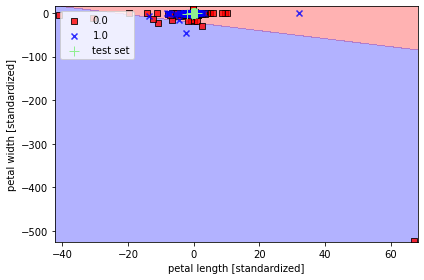

In [26]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=lr, test_idx=range(0, 50))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()